In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

MALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
pwt90_BDI = pd.read_csv("./pwt90_BDI.csv").set_index("year")
pwt90_BDI.index = pd.to_datetime(pwt90_BDI.index, format="%Y")

In [3]:
pwt90_BDI.head(2)

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,BDI,Burundi,Burundi Franc,1812.391479,1854.149780,2.763604,NaN,NaN,1.095495,1591.651123,...,0.016518,0.050144,-0.101433,0.028889,0.118100,0.089717,0.207769,0.159011,0.137497,0.130054
1961-01-01,BDI,Burundi,Burundi Franc,1569.187744,1608.281372,2.840903,NaN,NaN,1.095495,1392.645386,...,0.016291,0.049644,-0.105437,0.029853,0.140182,0.112480,0.240842,0.196731,0.171383,0.155535


<br>

__Group Work with Data 2__

# The Equilibrium Business Cycle Model 

__1.__ Select 3 variables that we studied (you can confirm with your TA if they are good
variables to use).

__2.__ Collect data from 1990 – 2015 on these 3 variables and GDP (we recommend using
the same data source for the 4 variables).

__3.__ Explain what the Real Business Cycle model predicts for these variables in terms of
their cyclicality.

__4.__ Explain what patterns data show between the 3 variables selected and GDP. Is it
what the model predicts?

__5.__ Give some reasons as to why the pattern predicted is valid or not. (Hint: Think about
the assumptions of the model and how they affect the model conclusions. Think also
in the other models that we studied – which assumptions changed? Are they
realistic?) 

<br>

<br>

# Data

- __Y__ (rgdpe)
- __P__ (pl_con)
- __L__ (emp)

In [4]:
data = pwt90_BDI.loc["1990":,:][["rgdpe", "pl_con", "emp"]]

In [5]:
cycle, data["rgdpe_potential"] = sm.tsa.filters.hpfilter(data["rgdpe"].values, 6.25)
data["rgdpe_gap"] = cycle/data["rgdpe_potential"]

<br>

# Old

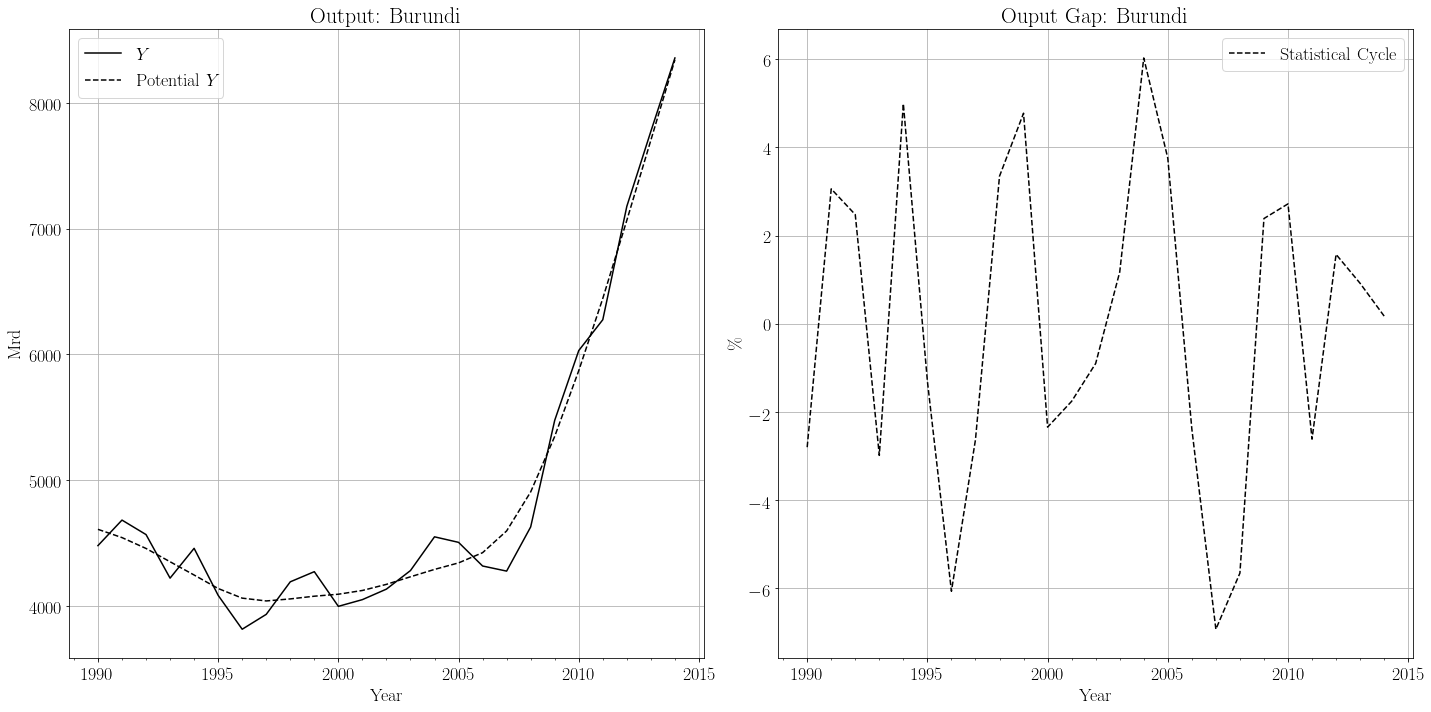

In [6]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()
data[["rgdpe", "rgdpe_potential"]].plot(style=['-','--'], color="black", ax=axes[0])
axes[0].legend(labels=[r"$Y$", r"Potential $Y$"])
axes[0].set_title("Output: Burundi", fontsize=22)
axes[0].set_ylabel("Mrd")
axes[0].set_xlabel("Year")
axes[0].grid()

(data[["rgdpe_gap"]]*100).plot(style=['--',':'], color="black", ax=axes[1])
axes[1].legend(labels=["Statistical Cycle"])
axes[1].set_title("Ouput Gap: Burundi", fontsize=22)
axes[1].set_ylabel("\%")
axes[1].set_xlabel("Year")
axes[1].grid()
plt.tight_layout()

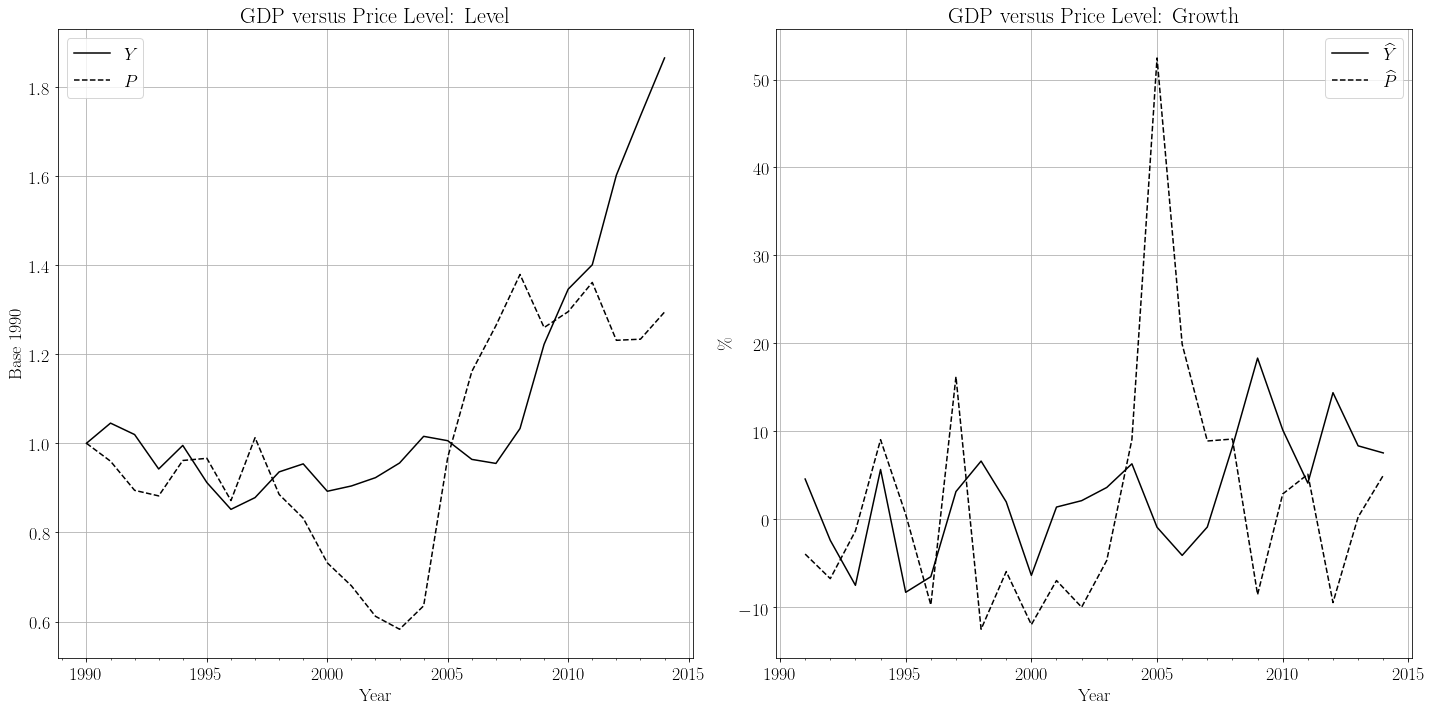

In [7]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()
(data[["rgdpe", "pl_con"]]/data[["rgdpe", "pl_con"]].iloc[0,:]).plot(style=['-','--'], color="black", ax=axes[0])
axes[0].legend(labels=[r"$Y$", r"$P$"])
axes[0].set_title("GDP versus Price Level: Level", fontsize=22)
axes[0].set_ylabel("Base 1990")
axes[0].set_xlabel("Year")
axes[0].grid()

(data.pct_change()*100)[["rgdpe", "pl_con"]].plot(style=['-','--'], color="black", ax=axes[1])
axes[1].legend(labels=[r"$\widehat{Y}$", r"$\widehat{P}$"])
axes[1].set_title("GDP versus Price Level: Growth", fontsize=22)
axes[1].set_ylabel("\%")
axes[1].set_xlabel("Year")
axes[1].grid()
plt.tight_layout()

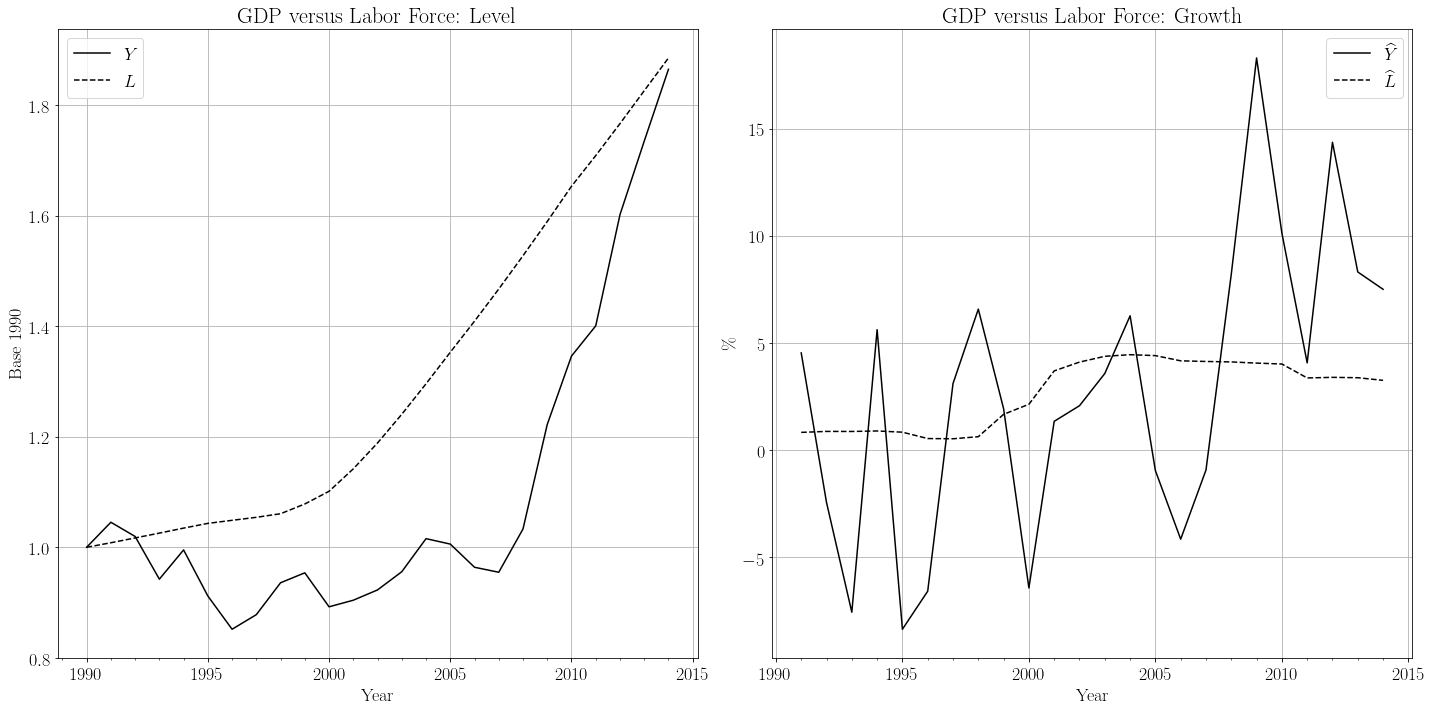

In [8]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()
(data[["rgdpe", "emp"]]/data[["rgdpe", "emp"]].iloc[0,:]).plot(style=['-','--'], color="black", ax=axes[0])
axes[0].legend(labels=[r"$Y$", r"$L$"])
axes[0].set_title("GDP versus Labor Force: Level", fontsize=22)
axes[0].set_ylabel("Base 1990")
axes[0].set_xlabel("Year")
axes[0].grid()

(data.pct_change()*100)[["rgdpe", "emp"]].plot(style=['-','--'], color="black", ax=axes[1])
axes[1].legend(labels=[r"$\widehat{Y}$", r"$\widehat{L}$"])
axes[1].set_title("GDP versus Labor Force: Growth", fontsize=22)
axes[1].set_ylabel("\%")
axes[1].set_xlabel("Year")
axes[1].grid()
plt.tight_layout()

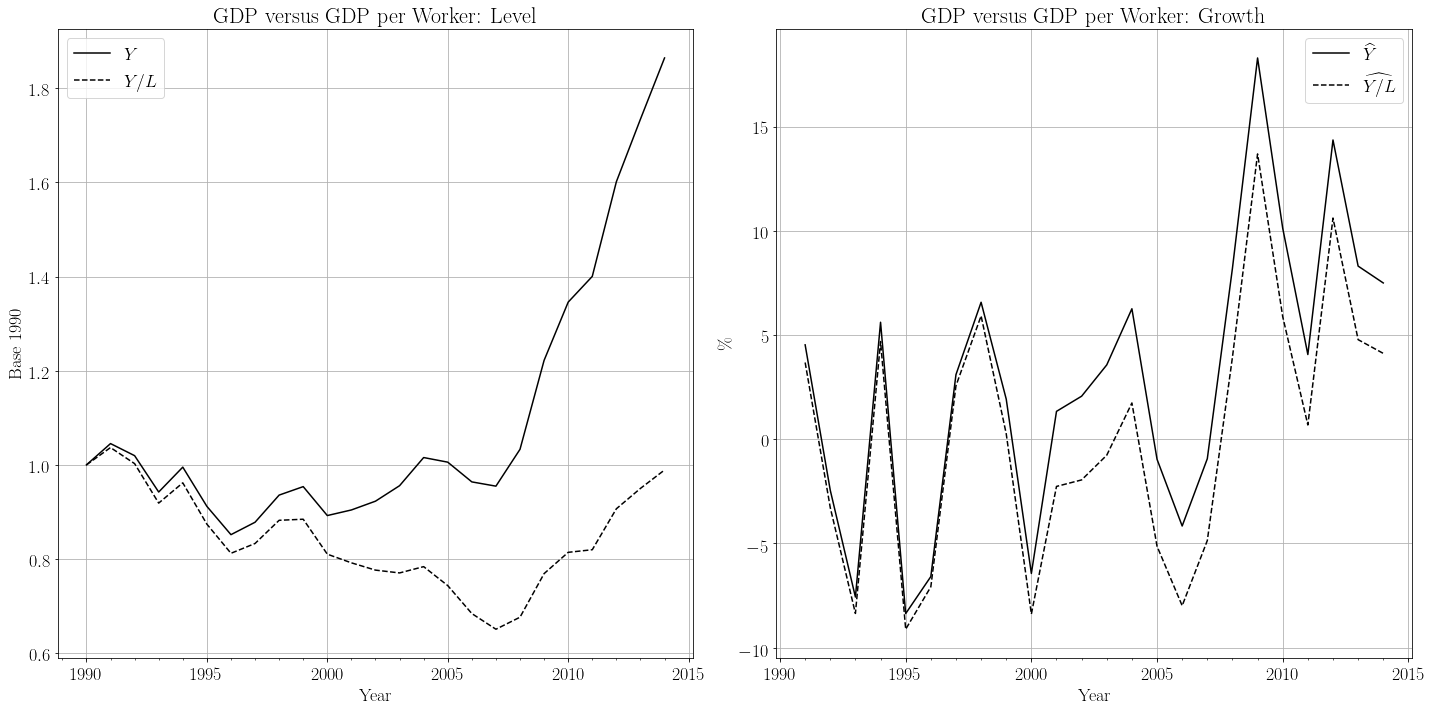

In [9]:
data["rgdpe_emp"] = data["rgdpe"]/data["emp"]

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()
(data[["rgdpe", "rgdpe_emp"]]/data[["rgdpe", "rgdpe_emp"]].iloc[0,:]).plot(style=['-','--'], color="black", ax=axes[0])
axes[0].legend(labels=[r"$Y$", r"$Y/L$"])
axes[0].set_title("GDP versus GDP per Worker: Level", fontsize=22)
axes[0].set_ylabel("Base 1990")
axes[0].set_xlabel("Year")
axes[0].grid()

(data.pct_change()*100)[["rgdpe", "rgdpe_emp"]].plot(style=['-','--'], color="black", ax=axes[1])
axes[1].legend(labels=[r"$\widehat{Y}$", r"$\widehat{Y/L}$"])
axes[1].set_title("GDP versus GDP per Worker: Growth", fontsize=22)
axes[1].set_ylabel("\%")
axes[1].set_xlabel("Year")
axes[1].grid()
plt.tight_layout()

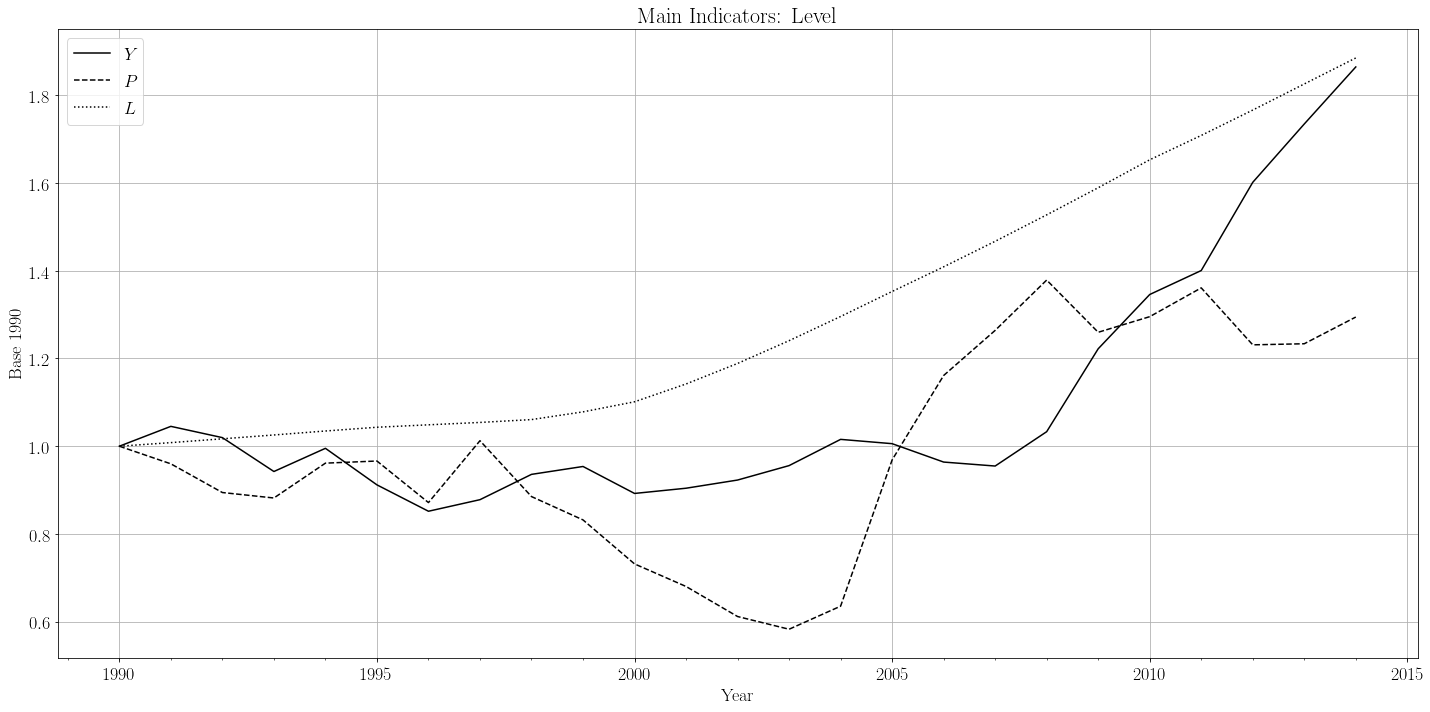

In [10]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
(data[["rgdpe", "pl_con", "emp"]]/data[["rgdpe", "pl_con", "emp"]].iloc[0,:]).plot(style=['-','--', ':'], color="black", ax=ax)
ax.legend(labels=[r"$Y$", r"$P$", r"$L$"])
ax.set_title("Main Indicators: Level", fontsize=22)
ax.set_ylabel("Base 1990")
ax.set_xlabel("Year")
ax.grid()
plt.tight_layout()

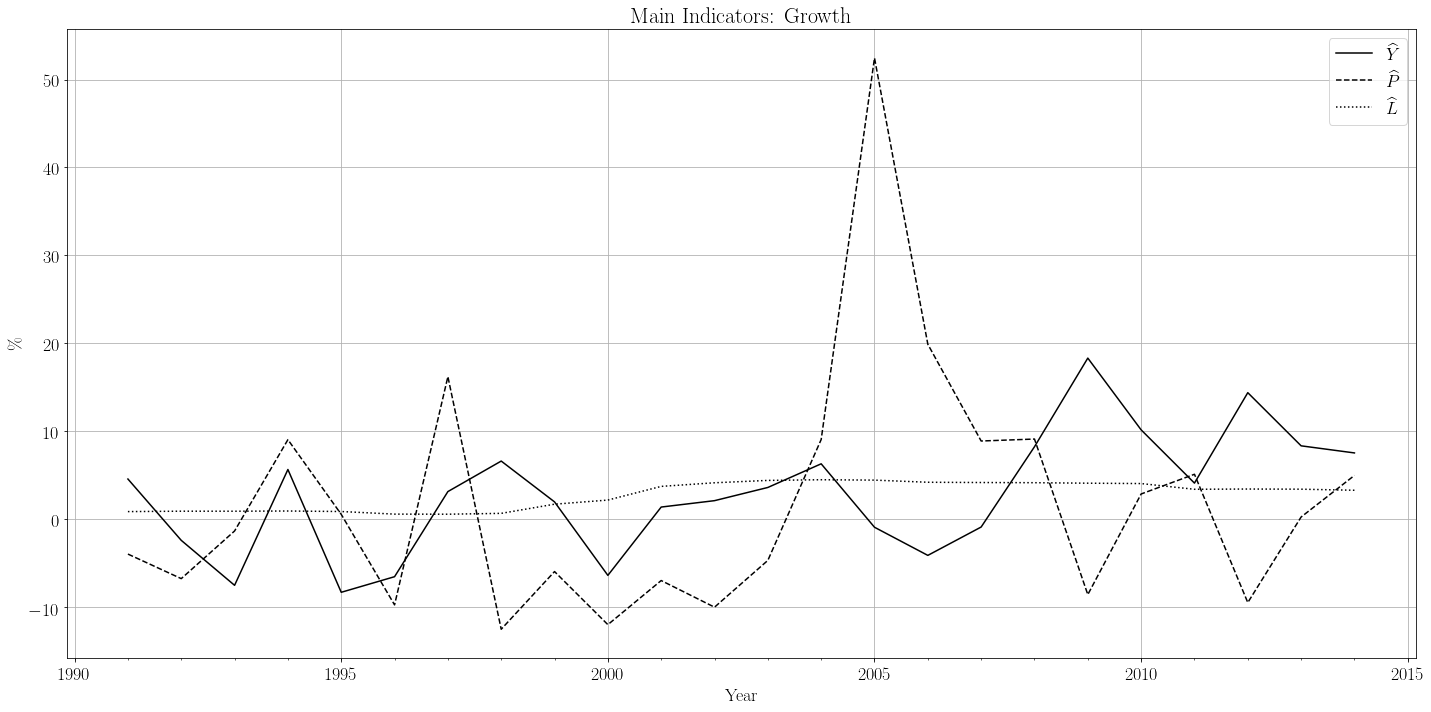

In [11]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
(data.pct_change()*100)[["rgdpe", "pl_con", "emp"]].plot(style=['-','--', ':'], color="black", ax=ax)
ax.legend(labels=[r"$\widehat{Y}$", r"$\widehat{P}$", r"$\widehat{L}$"])
ax.set_title("Main Indicators: Growth", fontsize=22)
ax.set_ylabel("\%")
ax.set_xlabel("Year")
ax.grid()
plt.tight_layout()

<br>

# New - Barro

- __ccon__ - Real consumption of households and government, at current PPPs (in mil. 2011US$) __(Figure 8.9 p186)__
- __emp__ - Number of persons engaged (in millions) __(Figure 9.7 p212)__
- __pl_con__ - Price level of CCON (PPP/XR), price level of USA GDPo in 2011=1  __(Figure 10.4 p249)__


In [12]:
data_barro = pwt90_BDI.loc["1990":,:][["rgdpe", "ccon", "emp", "pl_con"]]
label_dic = {"ccon":["Consumer Expenditure", "Consumer expenditure"], "emp":["Employment", "Employment"], "pl_con":["Price Level", "GDP deflator"]}

for col in data_barro.columns:
    cycle, data_barro[col+"_trend"] = sm.tsa.filters.hpfilter(data_barro[col].values, 6.25)
    data_barro[col+"_detrended"] = cycle/data_barro[col+"_trend"]

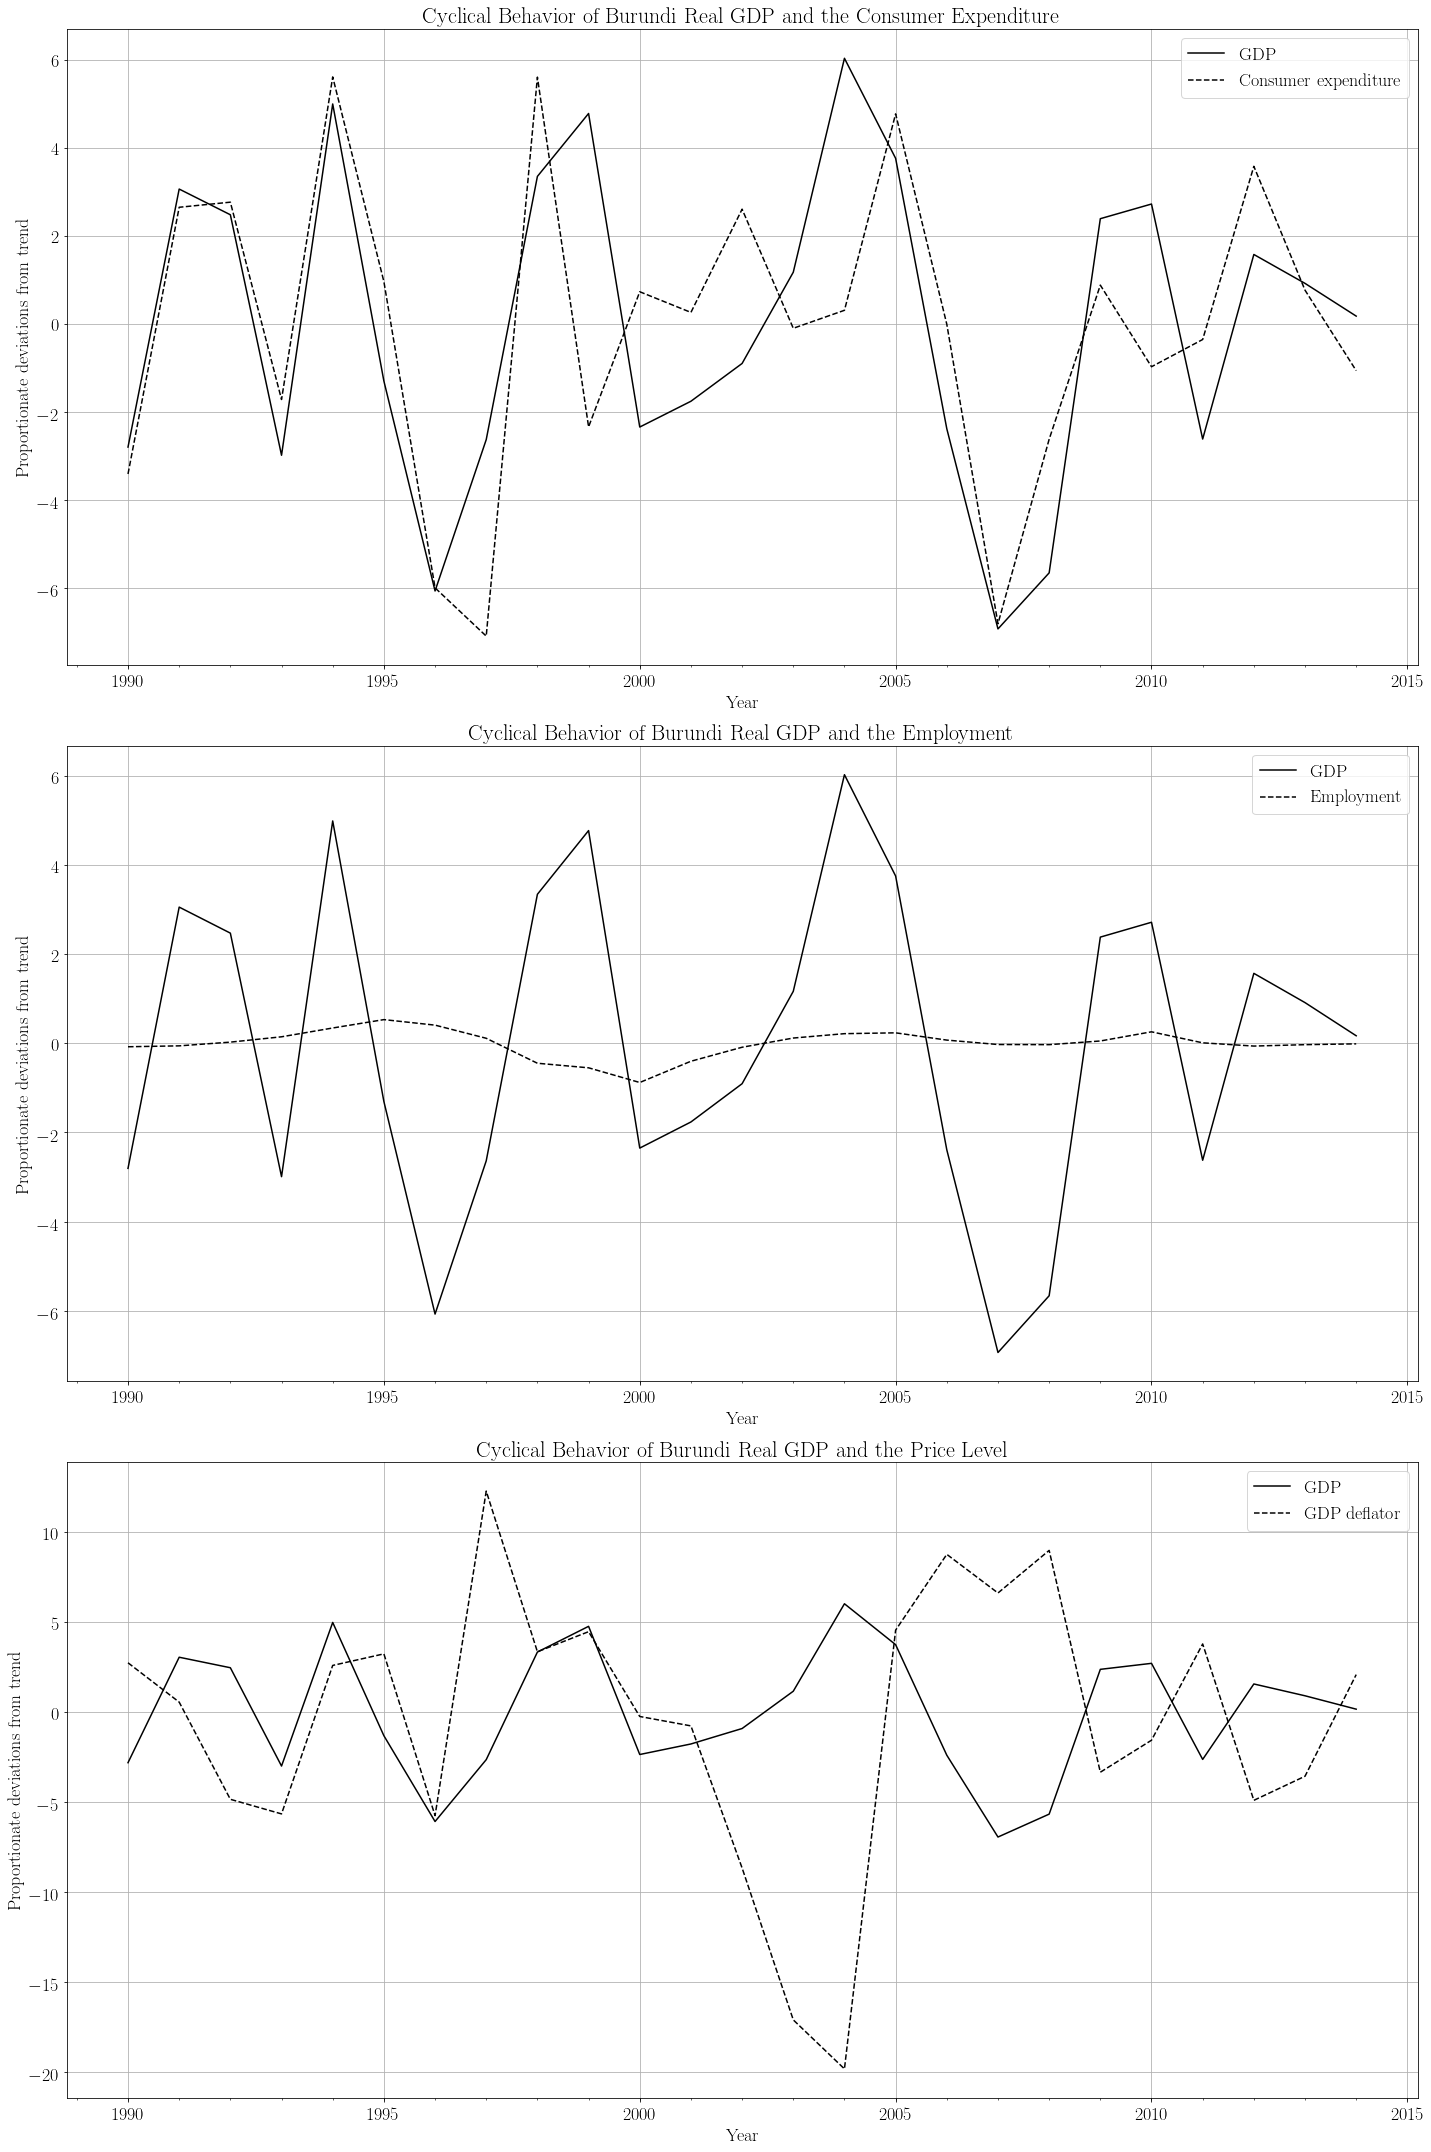

In [13]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 30)); axes = axes.flatten()
for i, indicator in enumerate(label_dic.keys()):
    (data_barro[["rgdpe_detrended", indicator+"_detrended"]]*100).plot(style=['-','--'], color="black", ax=axes[i])
    axes[i].legend(labels=["GDP", label_dic[indicator][1]])
    axes[i].set_title("Cyclical Behavior of Burundi Real GDP and the "+label_dic[indicator][0], fontsize=22)
    axes[i].set_ylabel("Proportionate deviations from trend")
    axes[i].set_xlabel("Year")
    axes[i].grid()
plt.tight_layout()

<br>

Just checking